## Exploratory Data Analysis on Telco Customer Churn Dataset

Churn is defined as the loss of clients 

This analysis focuses of a dataset of a telecommunication company to evaluate and analyse the reasons of voluntary churn. This analysis will further help realise the shortcomings and provide us with a scope of improvement.

- <a href='#1'>1. Data and Features</a>
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1 Churn/Attrition status using barplots</a>
        - <a href='#2.1.1'>2.1.1 Conclusion</a>
    -  <a href='#2.2'>2.2 Churn status: Tenure and Charges</a>   
        - <a href='#2.2.1'>2.2.1 Conclusion</a>
    -  <a href='#2.3'>2.3 Tenure and Charges using Scatterplot</a>     
        - <a href='#2.3.1'>2.3.1 Conclusion</a>
    -  <a href='#2.4'>2.4 Correlation</a>
        - <a href='#2.4.1'>2.4.1 Conclusion</a>
        - <a href='#2.4.1'>2.4.2 Pearson Correlation Method</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy




## [](http://) <a id='1'>1. Data and Features</a>

In [2]:
telco_filepath = "D:/telco.csv"
sns.set(font_scale=1.5)
pd.options.mode.chained_assignment = None
telco_data = pd.read_csv(telco_filepath)



print ("Rows     : " ,telco_data.shape[0])
print ("Columns  : " ,telco_data.shape[1])
print ("\nFeatures : \n" ,telco_data.columns.tolist())
print ("\nMissing values :  ", telco_data.isnull().sum().values.sum())
print ("\nUnique values :  \n",telco_data.nunique())


values=telco_data.columns.tolist()[1:18]
print(values)

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64
['gender', 'SeniorCitizen', 'Partner', 'Dependents

# <a id='2'>2. Exploratory Data Analysis</a>

### [](http://) <a id='2.1'>2.1 Churn/Attrition status using barplots</a>

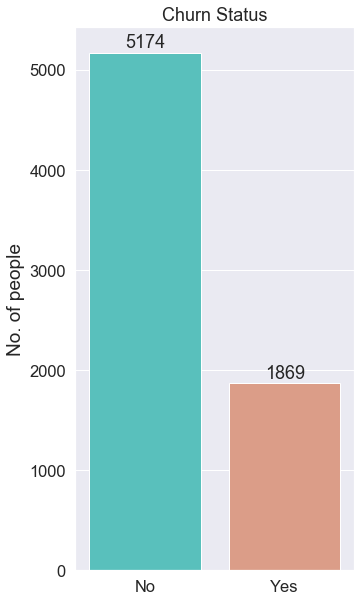

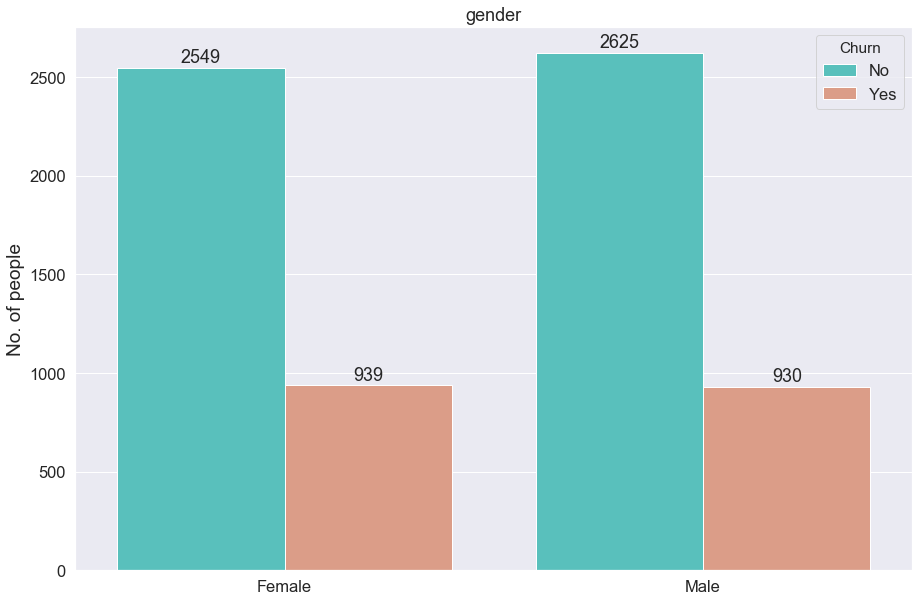

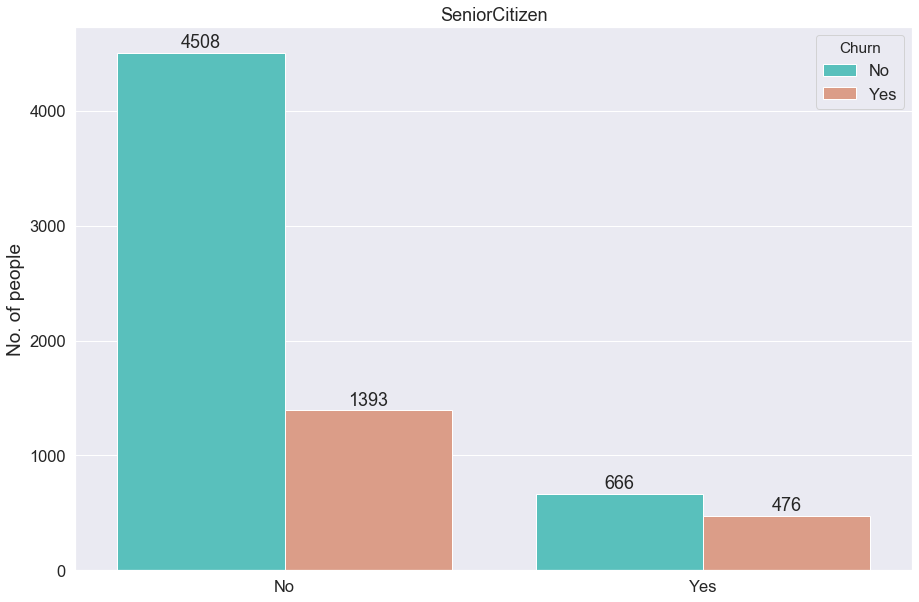

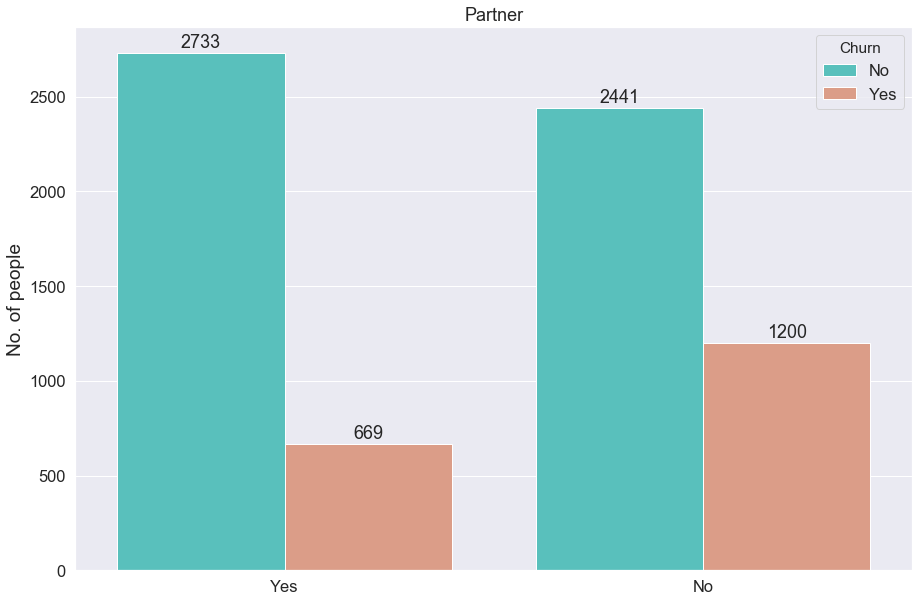

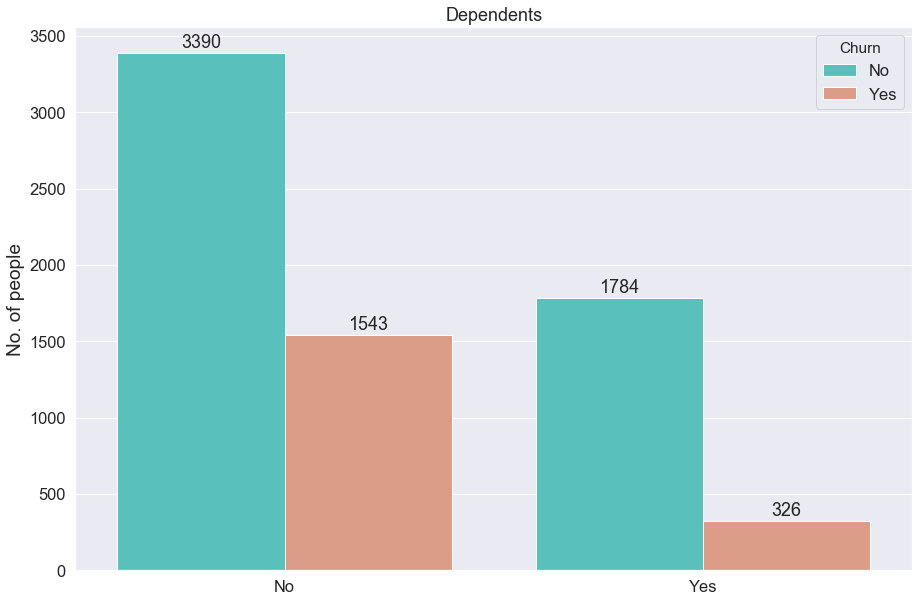

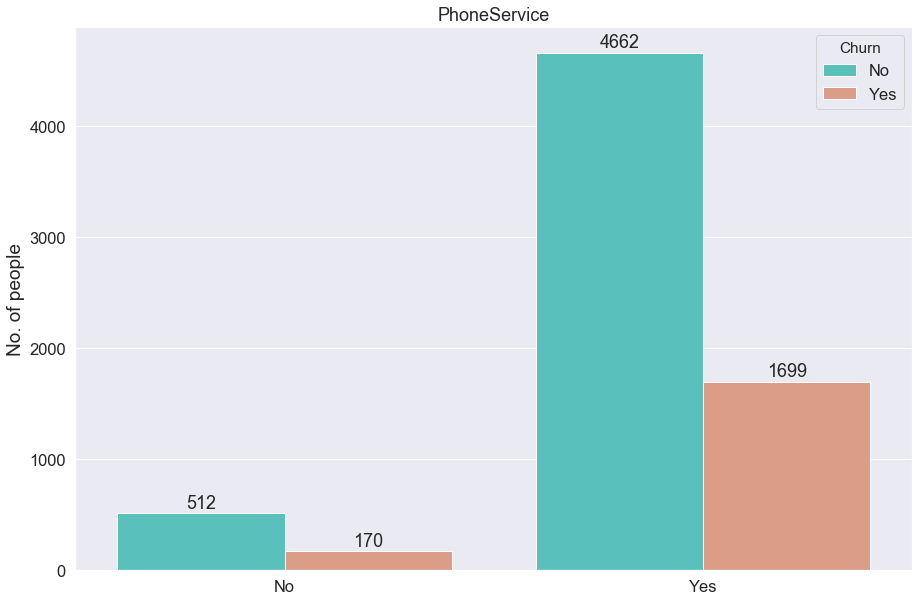

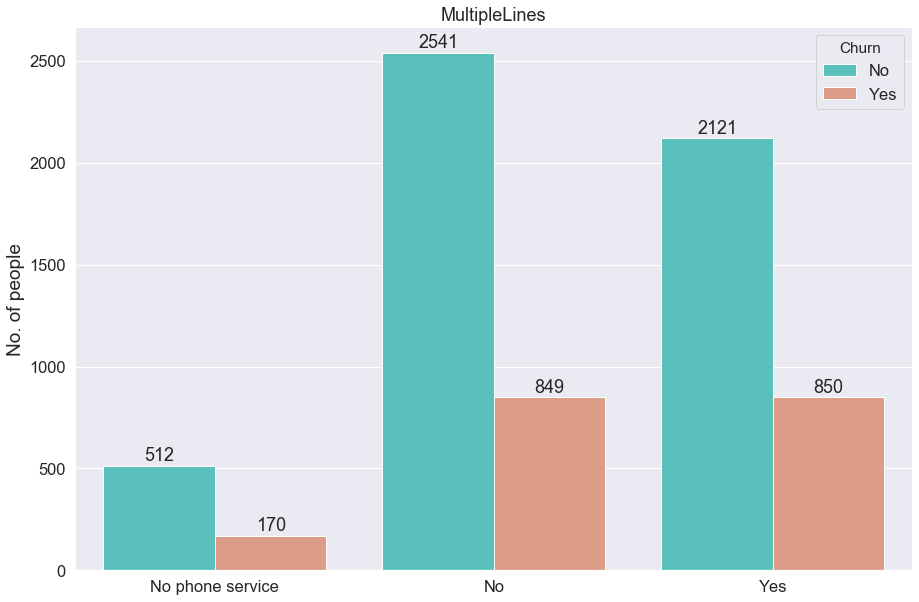

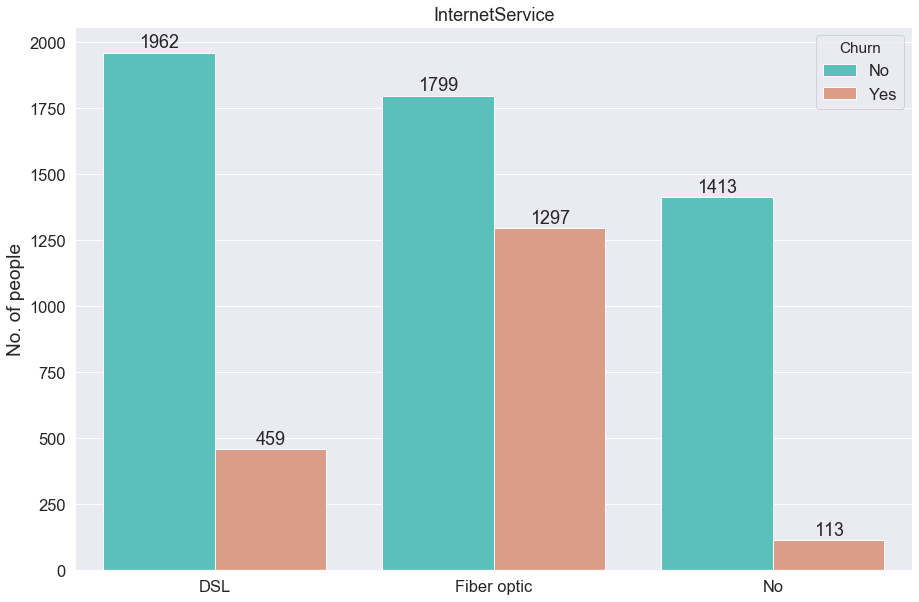

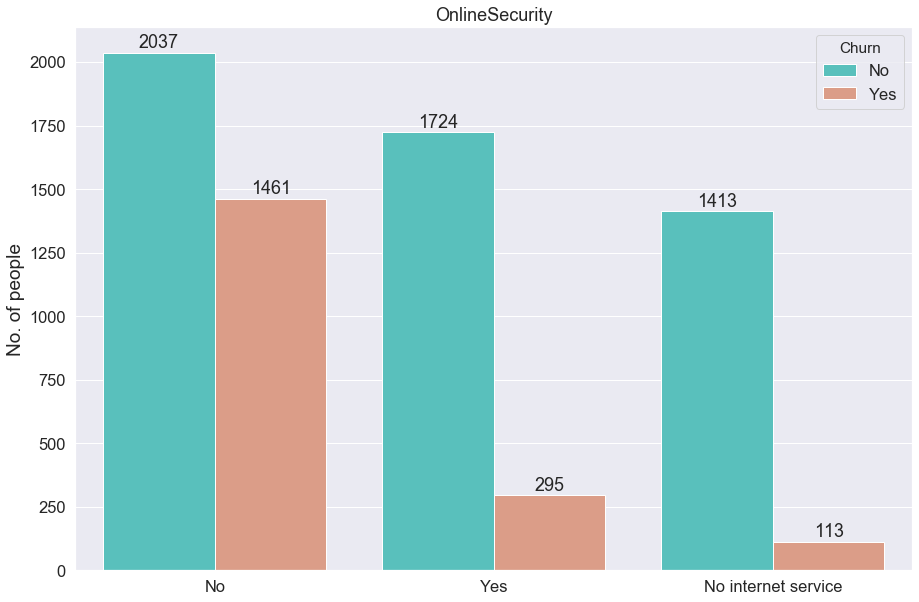

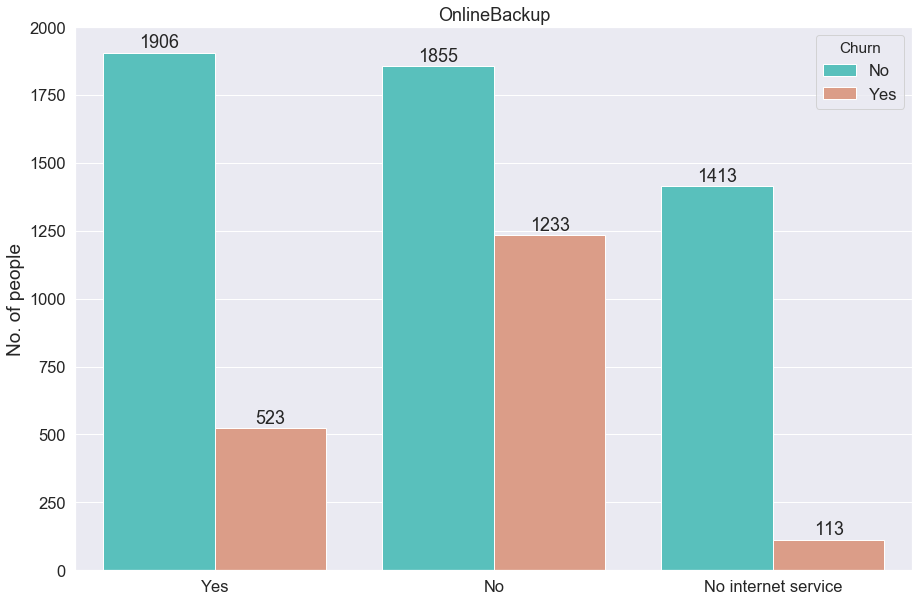

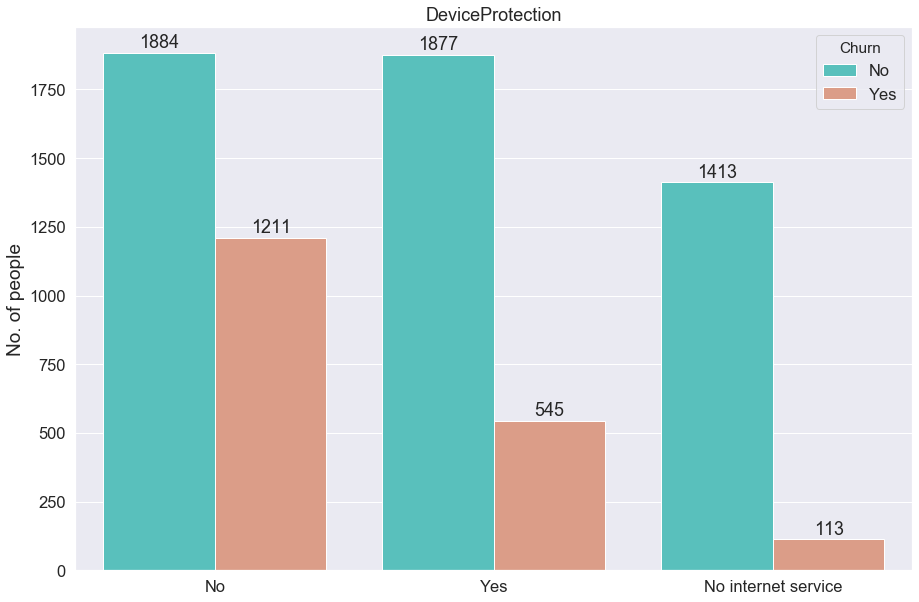

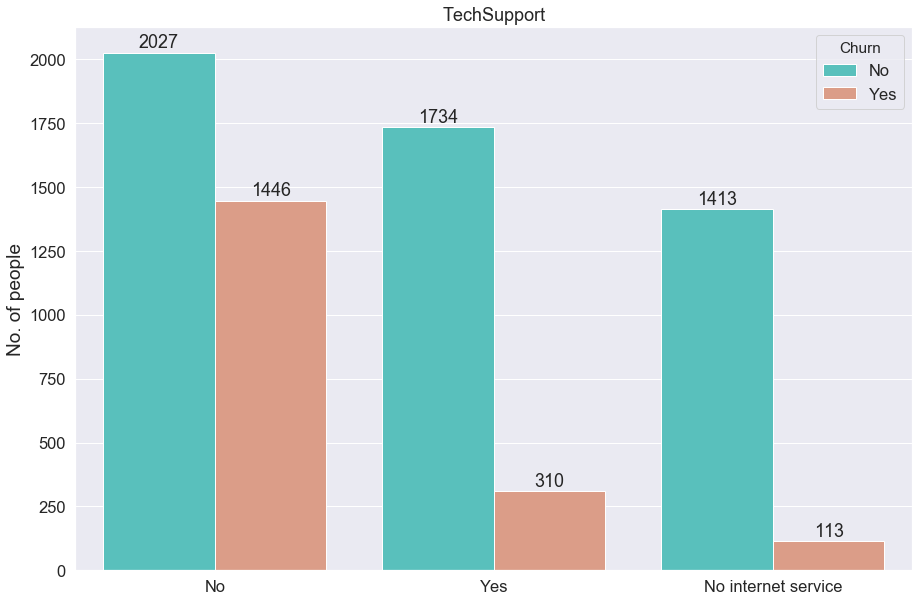

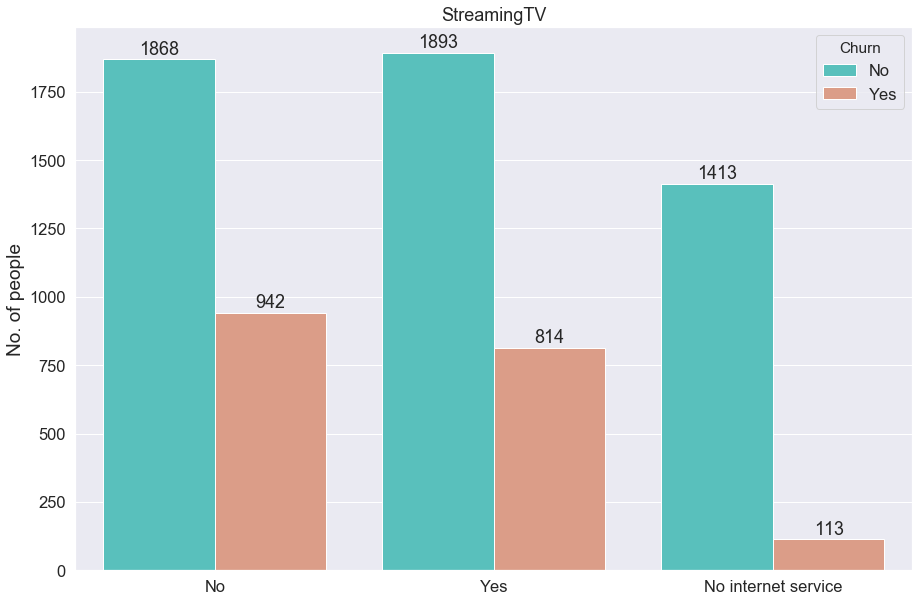

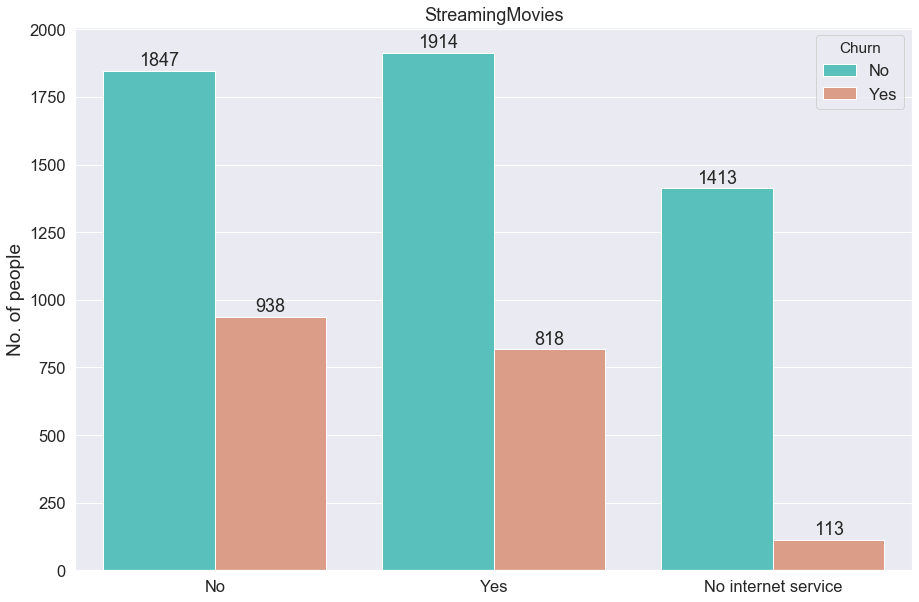

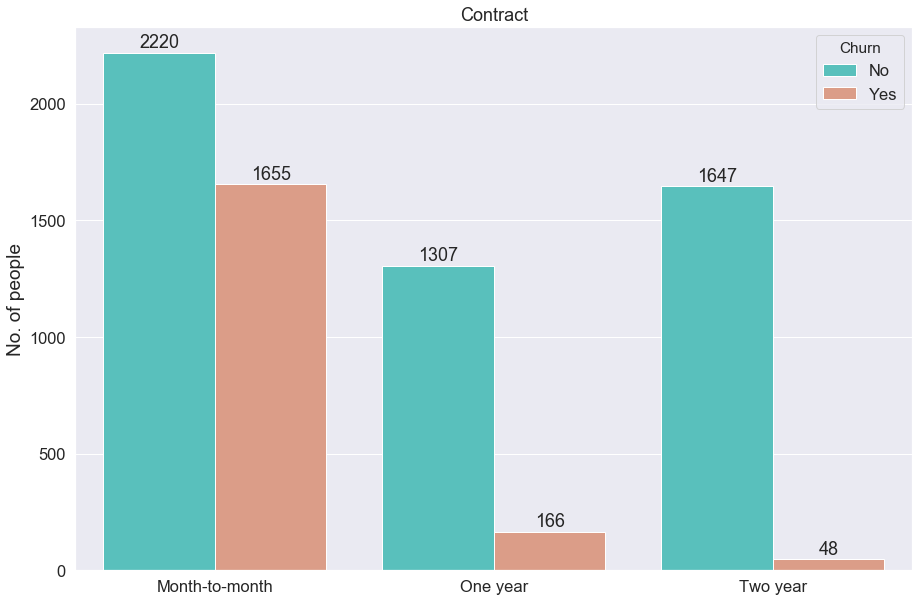

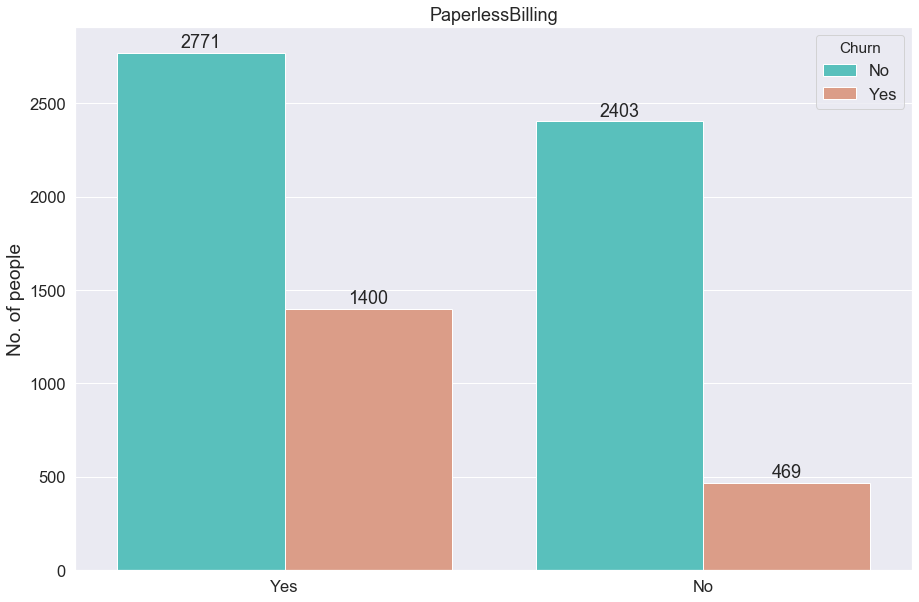

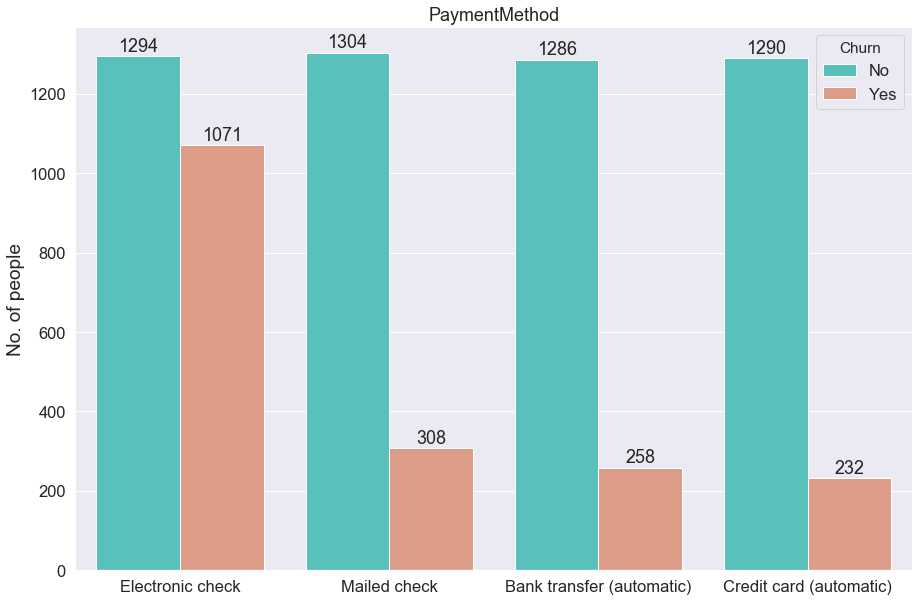

In [3]:
custom_palette = ["mediumturquoise","darksalmon"]
#TOTAL CHURN 
sns.set_palette(custom_palette)
plt.figure(figsize=(5,10))
plt.title("Churn Status",fontsize=18)
x=sns.countplot(x="Churn",data=telco_data)
for z in x.patches:
    x.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.ylabel("No. of people",fontsize=19)
plt.xlabel("")


#ATTRITIONS OF DATA
values=telco_data.columns.tolist()[1:18]
index=0
telco_data["SeniorCitizen"] = telco_data["SeniorCitizen"].replace({1:"Yes",0:"No"})
for i in values:
    
    if(index!=4): #I don't want a countplot of tenure
        plt.figure(figsize=(15,10))
        plt.title(values[index],fontsize=18)
        x=sns.countplot(x=telco_data.keys()[index+1],data=telco_data,hue="Churn")
        plt.ylabel("No. of people",fontsize=19)
        plt.xlabel("")
        for z in x.patches:
                x.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
                
        
        index=index+1
    else:
        index=index+1
        continue
    

### [](http://) <a id='2.1.1'>2.1.1 Conclusion</a>

- Churn status is not affected by gender
- Seniors citizens do not prefer this company and are more likely to churn
- People without partners dominate in attrition over the other group. The same goes with dependents.
- Most people have opted for phone service and almost 40% of the people have churned implying phone services need to be improved.
- Multiple lines is almost equally distributed amongst those who have opted for it and those who haven't. The churn seems independent of Multiple Lines since both groups have almost equal churn
- DSL is the best internet service provision and fibre optic performs the worst
- Most people are satisfied with the following amenities:
    1. Online Security
    1. Online Backup
    1. Device Protection
    1. Tech Support
- Customers who do not have services like Online Security, Online Backup and Tech Support have left the platform in the   past month.
- Streaming TV and movies needs to be improved as 43% of the customers who opted for them churned
- People are more likely to churn if they're on a month-to-month contract. One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. 
- Paperless billing has a slightly greater edge over non paperless billing. However, more than 50% of the people who opted for paperless billing churned
- Electronic check is the worst permforming payment method

## [](http://) <a id='2.2'>2.2 Tenure and Charges</a>

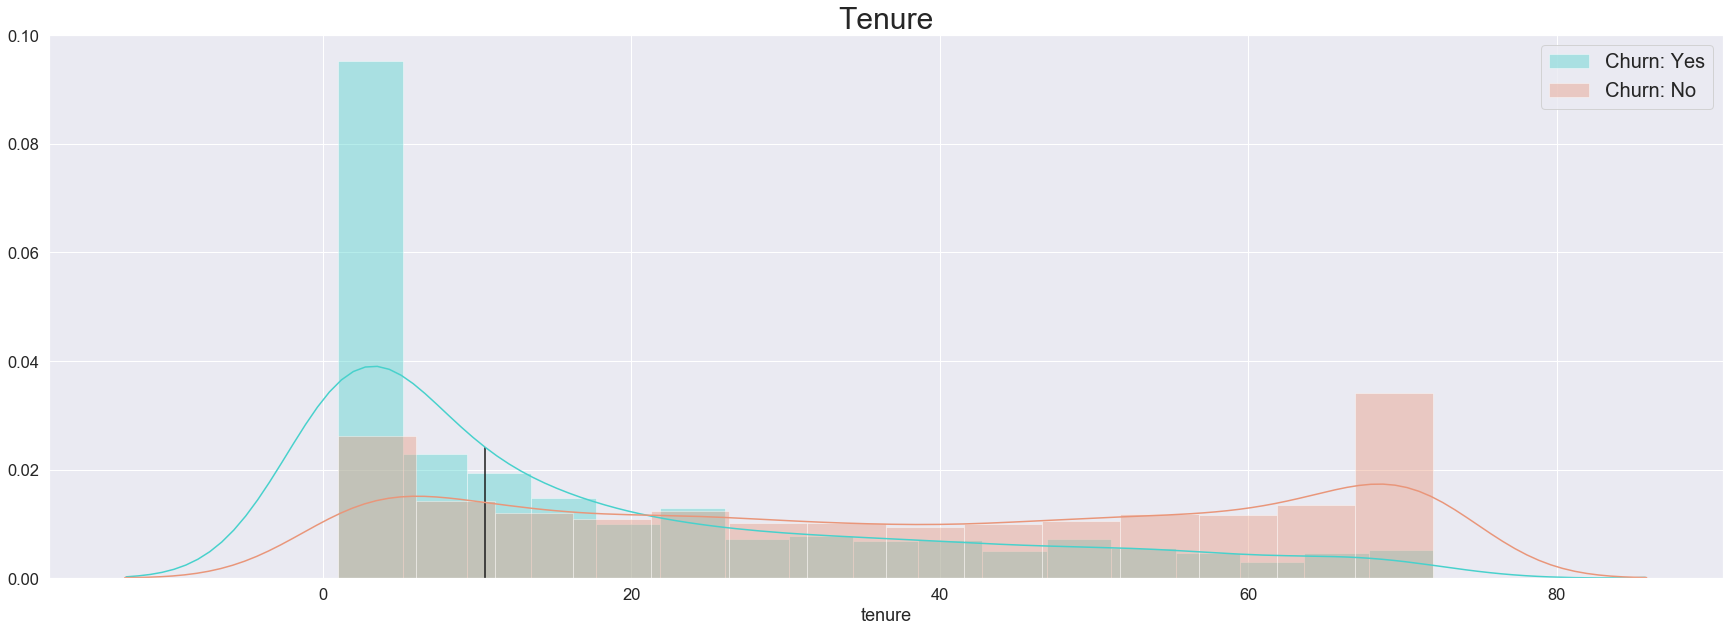

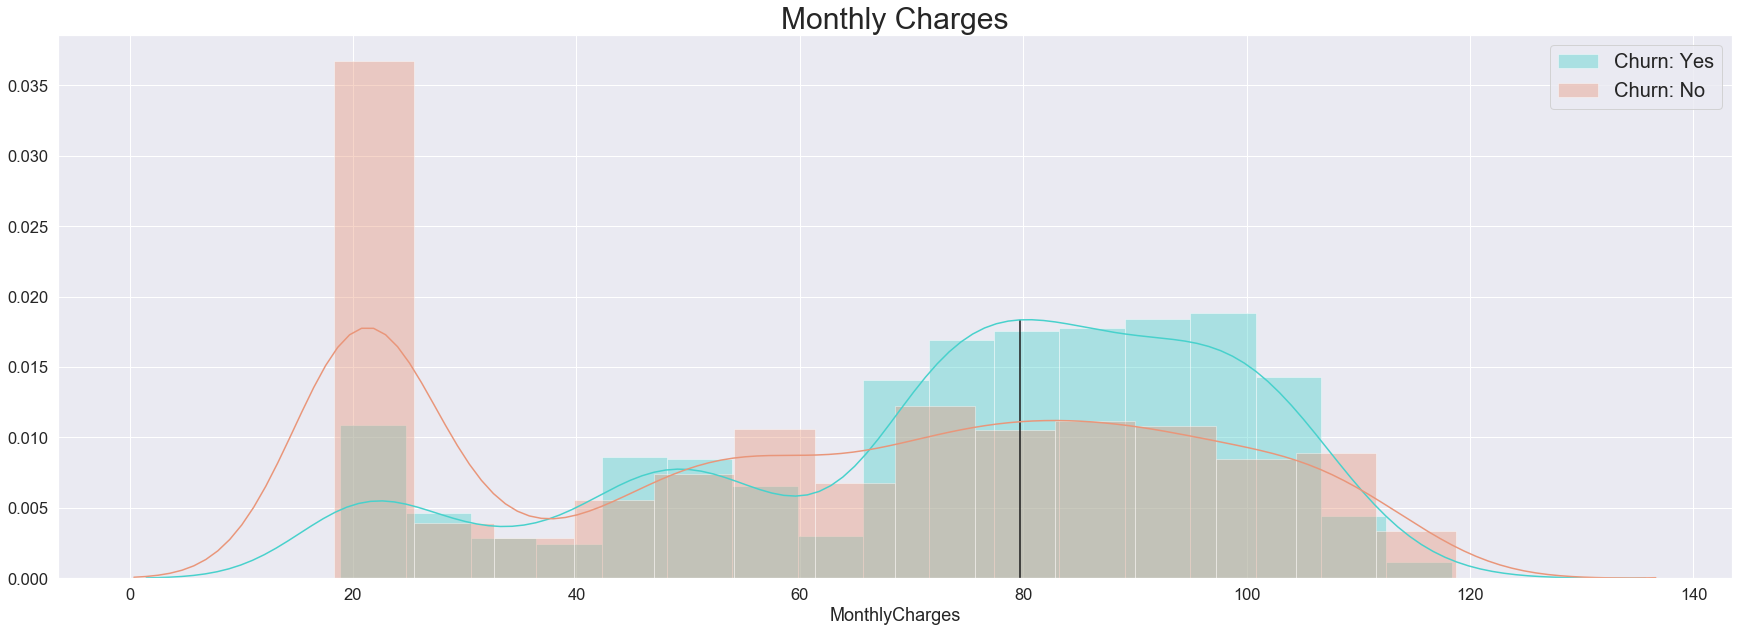

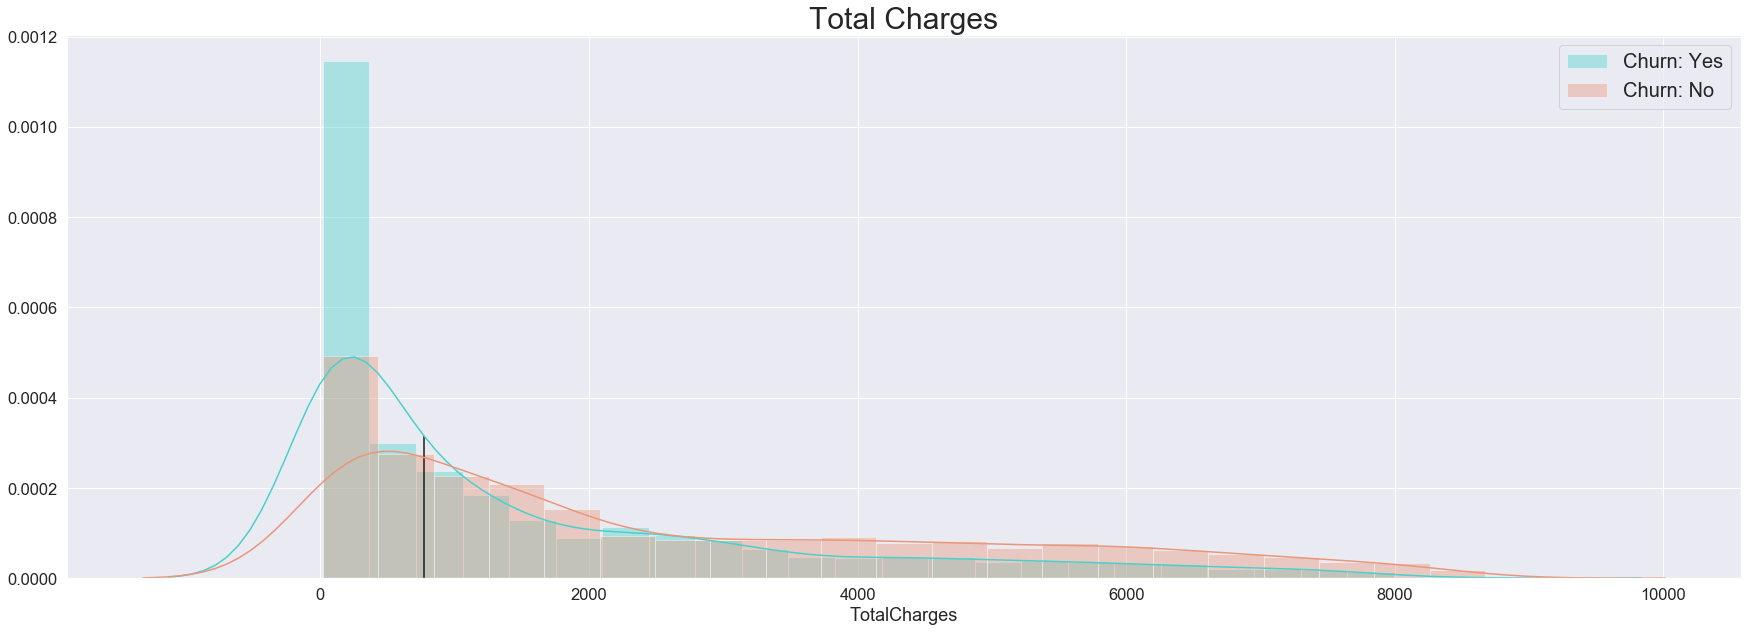

In [9]:

#converting total charges from object to a numerical type
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data= telco_data.dropna(subset=['TotalCharges'])

target_0 = telco_data.loc[telco_data['Churn'] == 'Yes']
target_1 = telco_data.loc[telco_data['Churn'] == 'No']


def hist(c,no_c,title):
    plt.figure(figsize=(30,10))
    plt.title(title,fontsize=30)


    m1=sns.distplot(c,label='Churn: Yes')
    m2=sns.distplot(no_c,label='Churn: No')
    plt.legend(fontsize=20)
    
    #function for median
    x,y = m1.get_lines()[0].get_data()
    cdf = scipy.integrate.cumtrapz(y, x, initial=0)
    
    nearest_05 = np.abs(cdf-0.5).argmin()
    x_median = x[nearest_05]
    y_median = y[nearest_05]
    plt.vlines(x_median, 0, y_median)
    plt.show()

hist(target_0['tenure'],target_1['tenure'],"Tenure") 

hist(target_0['MonthlyCharges'],target_1['MonthlyCharges'],"Monthly Charges")

hist(target_0['TotalCharges'],target_1['TotalCharges'],"Total Charges")

### [](http://) <a id='2.2.1'>2.2.1 Conclusion</a>

- **Tenure**: The median tenure for customers who have left is around 10 months. (As denoted by the black line in the KDE of tenure
- **Monthly Charges**: Customers who have churned, have high monthly charges. 
- **Total Charges**: Customers who have churned, have comparatively low total charges.


## [](http://) <a id='2.3'>2.3 Tenure and Charges using Scatterplot</a>

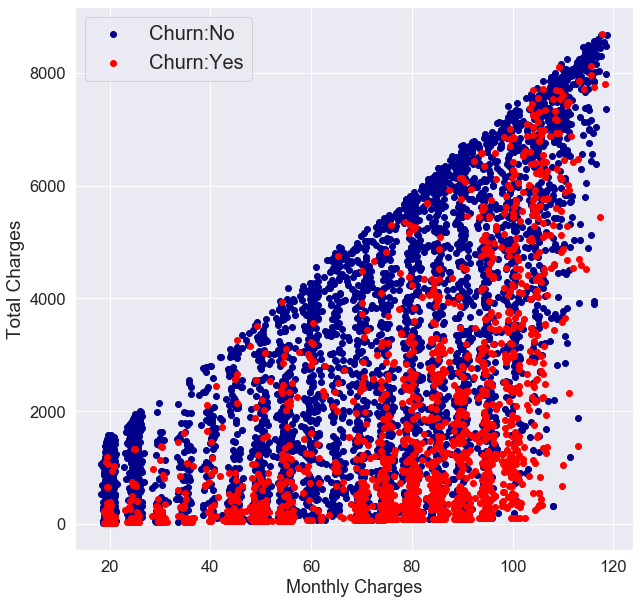

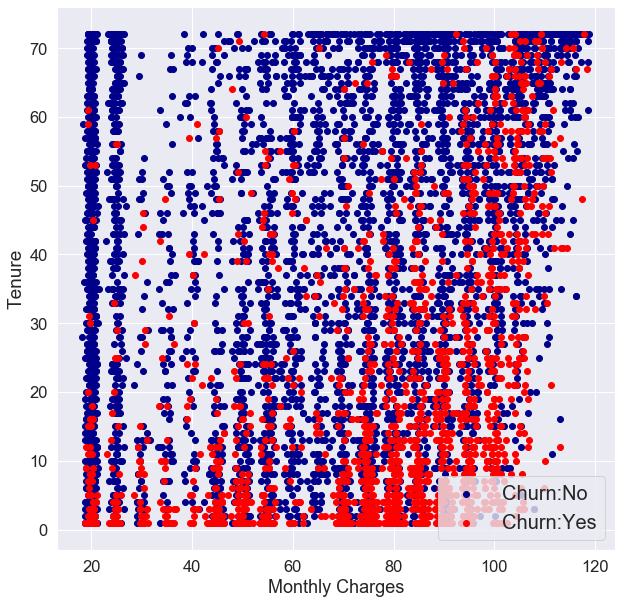

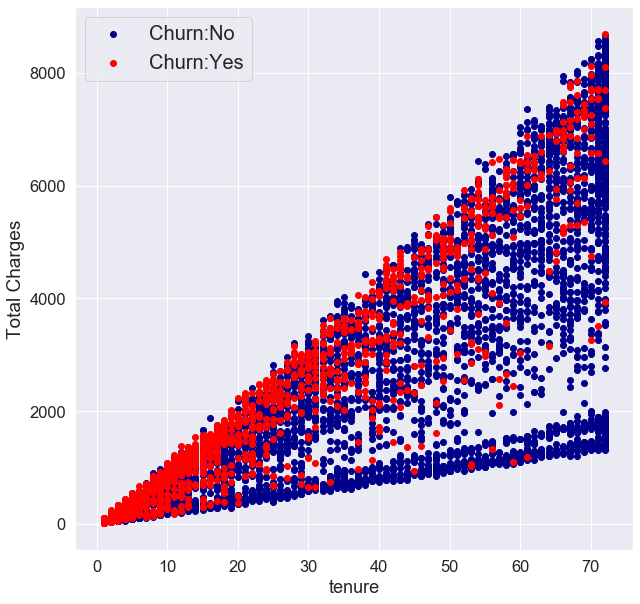

In [5]:

type1 = telco_data.loc[telco_data['Churn'] == 'Yes']
type2 = telco_data.loc[telco_data['Churn'] == 'No']

def scatter(a1,b1,c1,d1,e1,f1):
    
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    
    ax1.scatter(x =a1, y=b1,c="darkblue",label="Churn:No")
    ax1.scatter(x =c1, y=d1,c="red",label="Churn:Yes")
    plt.ylabel(e1,fontsize=19)
    plt.xlabel(f1)
    plt.legend(fontsize=20)

scatter(type2['MonthlyCharges'],type2['TotalCharges'],type1['MonthlyCharges'],type1['TotalCharges'],"Total Charges", "Monthly Charges")
scatter(type2['MonthlyCharges'],type2['tenure'],type1['MonthlyCharges'],type1['tenure'],"Tenure", "Monthly Charges")
scatter(type2['tenure'],type2['TotalCharges'],type1['tenure'],type1['TotalCharges'],"Total Charges", "tenure")

### [](http://) <a id='2.3.1'>2.3.1 Conclusion</a>

- Boundaries more visible in scatterplot
- Total charges and Monthly charges follow linearity 
- Lower the tenure and total charges, higher the churn rate

## [](http://) <a id='2.4'>2.4 Correlation</a> 

Correlation is defined as the interdepence of variables

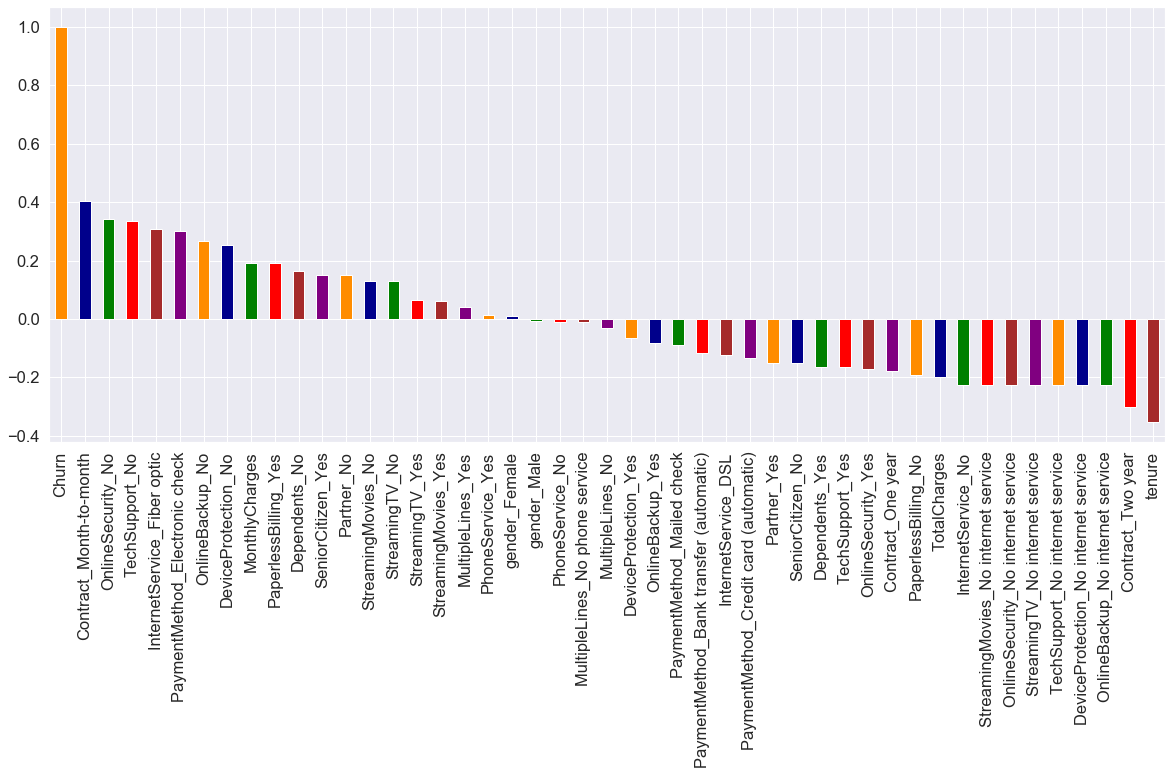

In [6]:
t1 = telco_data.iloc[:,1:]
#converting to binary variable
t1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
t1['Churn'].replace(to_replace='No',  value=0, inplace=True)

#converting to dummy variables
dummies = pd.get_dummies(t1)
dummies.head()

plt.figure(figsize=(20,8))
dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color=['darkorange', 'darkblue', 'green', 'red', 'brown','purple'])

### [](http://) <a id='2.4.1'>2.4.1 Conclusion</a>

#### Top 5 highest churns are observed in the following:

1. Month to Month contract
1. No online security
1. No tech support
1. Internet Service: Fibre optic
1. Payment Method: Electronic cheque

#### Top 5 least churns are observed in the following:

1. Tenure
1. Two year contract
1. No internet service
1. Streaming TV: No internet service
1. Online security: No internet service

## [](http://) <a id='2.4'>2.4.2 Pearson Correlation Method</a> 

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.


- Correlations are never lower than -1. A correlation of -1 indicates that the data points in a scatter plot lie exactly on a straight descending line; the two variables are perfectly negatively linearly related.
- A correlation of 0 means that two variables don't have any linear relation whatsoever. However, some non linear relation may exist between the two variables.
- Correlation coefficients are never higher than 1. A correlation coefficient of 1 means that two variables are perfectly positively linearly related; the dots in a scatter plot lie exactly on a straight ascending line.


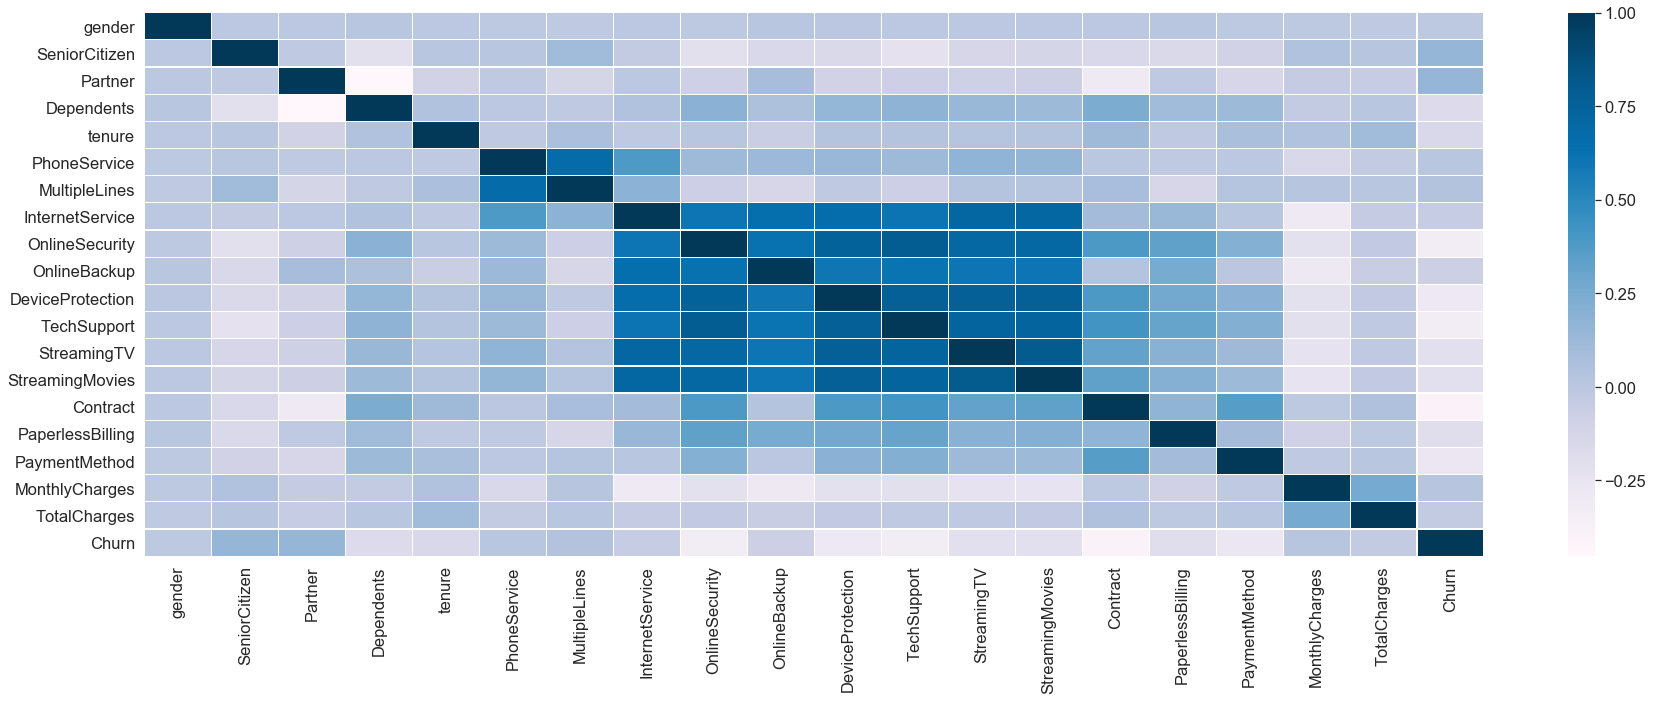

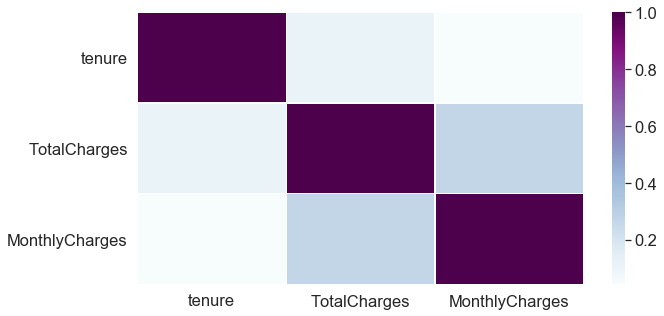

In [7]:
plt.figure(figsize=(30, 10))
corr = t1.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2,cmap="PuBu")

plt.figure(figsize=(10, 5))
df=pd.DataFrame(telco_data,columns=['tenure','TotalCharges','MonthlyCharges'])
corr1 = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr1, xticklabels=corr1.columns, yticklabels=corr1.columns, 
                 linewidths=.2,cmap="BuPu")

